In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import MaxNLocator

In [57]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [58]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
"""We will begin by checking how many missing values we have:"""

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [60]:
"""Let's make a copy of the dataset to work with"""

netflix_df_copy = netflix_df.copy()

In [61]:
"""We will replace the null values for the director, cast and country columns with 'Unknown' (it doesn't make sense to do an imputation since there is no correct value to impute; we can't
also erase the rows with missing values for 'director', 'cast' and 'country', because we would lose half the dataset)"""

netflix_df_copy = netflix_df_copy.fillna({
    "director": "Unknown",
    "cast": "Unknown",
    "country": "Unknown"
})

In [62]:
"""Now we are left with a couple of values missing for the columns 'date_added', 'rating' and 'duration'. Like before, we can't impute any values here because that would distort
the info of the whole row. Since the number of missing values here is little, we can just drop the rows that have them without fear of losing a big part of the dataset."""

netflix_df_copy = netflix_df_copy.dropna()

In [63]:
"""We check that there are no missing values left:"""

netflix_df_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [64]:
"""Let's see now if we have duplicated rows:"""

print(netflix_df_copy.duplicated().sum())

0


In [65]:
"""We don't have duplicated rows. But let's see if we have duplicated values for the 'title' column"""

print(netflix_df_copy["title"].duplicated().sum())

0


In [66]:
"""It would also be weird if there were two movies with the exact same cast (with actors listed in the exact same order):"""

print(netflix_df_copy["cast"].duplicated().sum())

1111


In [67]:
"""There are 1111 cases of duplicated values! Of course, most of them are the 'Unknown' values we input for the missing cast values. Let's get rid of those rows and see which ones have
duplicated values for 'cast':"""

netflix_df_copy_dup = netflix_df_copy[netflix_df_copy["cast"].duplicated(keep=False)]
netflix_df_copy_dup = netflix_df_copy_dup[netflix_df_copy_dup["cast"] != "Unknown"]
netflix_df_copy_dup.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
39,s40,TV Show,Chhota Bheem,Unknown,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
55,s56,TV Show,Nailed It,Unknown,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...
56,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,"September 15, 2021",2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",Unknown,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",Unknown,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
83,s84,TV Show,Metal Shop Masters,Unknown,Jo Koy,Unknown,"September 10, 2021",2021,TV-MA,1 Season,Reality TV,"On this competition show, a group of metal art..."
95,s96,TV Show,The Circle,Unknown,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
184,s185,TV Show,Sparking Joy,Unknown,Marie Kondo,United States,"August 31, 2021",2021,TV-PG,1 Season,Reality TV,"In this reality series, Marie Kondo brings her..."
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,Unknown,"August 25, 2021",2021,TV-14,93 min,Documentaries,Bob Ross brought joy to millions as the world’...


In [68]:
"""We can see that the identical cast in several rows correspond to the same movie, but targeted for a different language. Let's delete the duplicates."""

netflix_df_copy = netflix_df_copy.drop_duplicates(subset="cast", keep="first")

In [69]:
"""Now we will convert the 'date_added' column to datetime format. There are cells that have a blank space before the date, so we need to eliminate that in order for the conversion
to work:"""

netflix_df_copy["date_added"] = netflix_df_copy["date_added"].str.strip()
netflix_df_copy["date_added"] = pd.to_datetime(netflix_df_copy["date_added"])
netflix_df_copy["date_added"] = netflix_df_copy["date_added"].dt.strftime("%Y-%m-%d")

C:\Users\gldv9\AppData\Local\Temp\ipykernel_37396\4085847026.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df_copy["date_added"] = pd.to_datetime(netflix_df_copy["date_added"])


"""The 'country' column indicates the countries a certain title is available in; most titles can be viewed in several countries, so they have a comma-separated list of countries in this
column. This is unconvenient if, for instance, we wanted to know the number of movies/tv shows per country. With this in mind, we will duplicate each row that has several values for 'country',
as many times as the number of countries it has, keeping one country per row. Also, we wil create a column called 'Country_of_origin' to keep track of the country the title originated in."""

netflix_countries_df = netflix_df_copy.assign(country=netflix_df_copy["country"].str.split(","))
netflix_countries_df["Country_of_origin"] = netflix_df_copy["country"].str.split(",").str[0]
netflix_countries_df = netflix_countries_df.explode("country").reset_index(drop=True)

In [70]:
"""As of now, it's a bit difficult to identify the genre of the titles. We will create a column for each of the genres,containing the value 'True' if the title corresponds to it or 'False'
if it doesn't."""

netflix_df_copy["Comedy"] = netflix_df_copy["listed_in"].str.contains("Comed", case=False, na=False)
netflix_df_copy["Drama"] = netflix_df_copy["listed_in"].str.contains("Dram", case=False, na=False)
netflix_df_copy["Horror"] = netflix_df_copy["listed_in"].str.contains("Horror", case=False, na=False)
netflix_df_copy["Crime"] = netflix_df_copy["listed_in"].str.contains("Crime", case=False, na=False)
netflix_df_copy["Thriller"] = netflix_df_copy["listed_in"].str.contains("Thriller", case=False, na=False)
netflix_df_copy["Action"] = netflix_df_copy["listed_in"].str.contains("Action", case=False, na=False)
netflix_df_copy["Adventure"] = netflix_df_copy["listed_in"].str.contains("Adventure", case=False, na=False)
netflix_df_copy["Romantic"] = netflix_df_copy["listed_in"].str.contains("Roman", case=False, na=False)
netflix_df_copy["Documentary"] = netflix_df_copy["listed_in"].str.contains("Docu", case=False, na=False)
netflix_df_copy["Sci-Fi"] = netflix_df_copy["listed_in"].str.contains("Sci-Fi", case=False, na=False)

In [71]:
"""We don't need the column 'listed_in' anymore."""

netflix_df_copy = netflix_df_copy.drop("listed_in", axis=1)

In [72]:
"""It would be cleaner if we had a separate table for movies and TV shows:"""

netflix_TV = netflix_df_copy[netflix_df_copy["type"]=="TV Show"]
netflix_movies = netflix_df_copy[netflix_df_copy["type"]=="Movie"]

In [73]:
"""Since TV shows and movies are now separated, we don't need the 'type' column."""

netflix_movies = netflix_movies.drop("type", axis=1)
netflix_TV = netflix_TV.drop("type", axis=1)

MOVIES

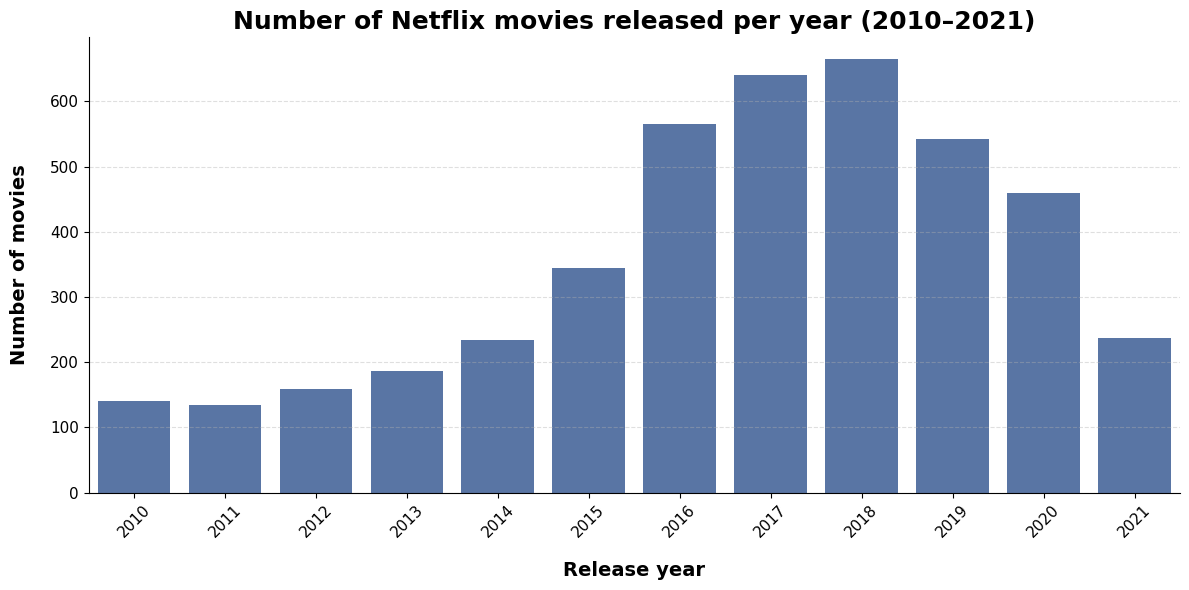

In [ ]:
"""Let's have a look at how many movies are released each year. Since there are way too many years to consider, we'll only focus in the period 2010-2021:"""

movies_since_2010 = netflix_movies[netflix_movies["release_year"] >= 2010]
movies_per_year = movies_since_2010["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    x=movies_per_year.index,
    y=movies_per_year.values,
    color="#4C72B0"
)

plt.title("Number of Netflix movies released per year (2010–2021)", fontsize=18, weight="bold")
plt.xlabel("Release year",
           fontsize=14,
           fontweight="bold",
           labelpad=15)
plt.ylabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

sns.despine()

plt.tight_layout()

plt.savefig(
    "figures/movies_per_year.png",
    dpi=150,
    bbox_inches="tight"
)

plt.show()


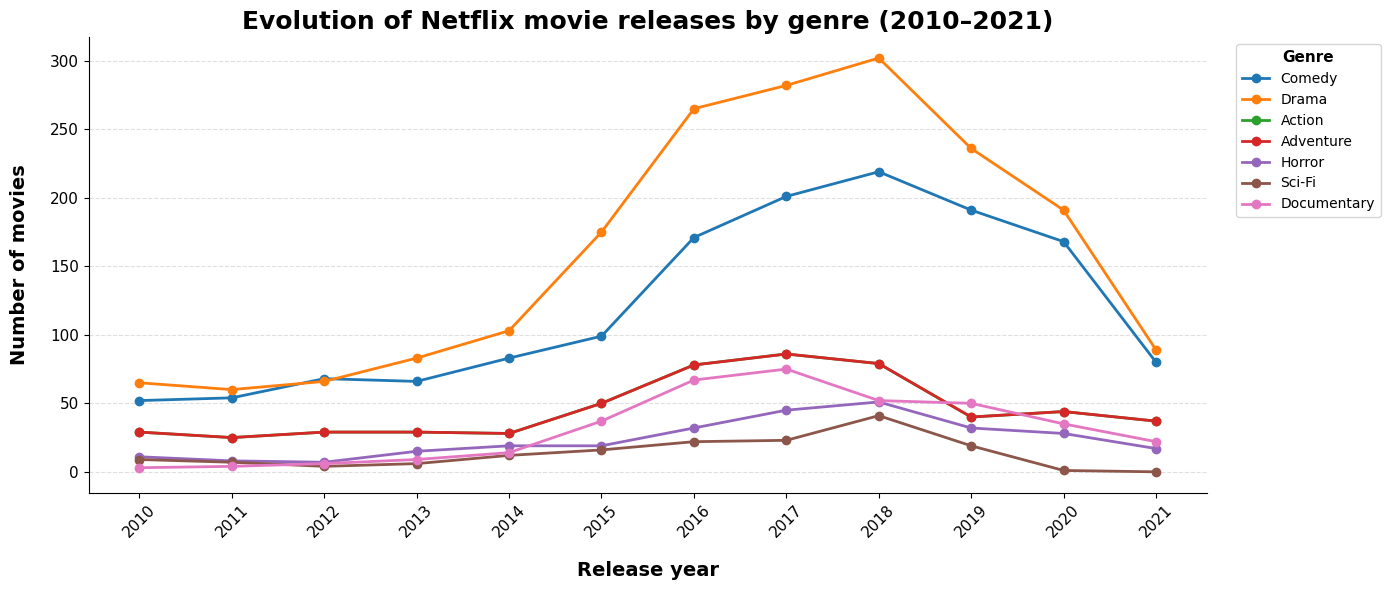

In [75]:
"""How about the distribution of each genre per year?"""

genres = ["Comedy", "Drama", "Action", "Adventure", "Horror", "Sci-Fi", "Documentary"]

movies_per_year_by_genre = movies_since_2010.groupby("release_year")[genres].sum()

plt.figure(figsize=(14, 6))

for genre in genres:
    plt.plot(
        movies_per_year_by_genre.index,
        movies_per_year_by_genre[genre],
        marker="o",
        linewidth=2,
        label=genre
    )

plt.title(
    "Evolution of Netflix movie releases by genre (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Release year",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(movies_per_year_by_genre.index, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

legend = plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend.get_title().set_fontsize(11)
legend.get_title().set_fontweight("bold")

sns.despine()
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

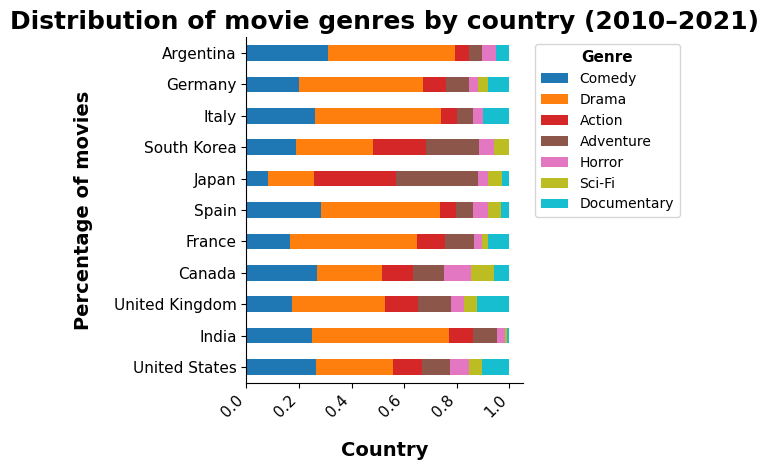

In [76]:
"""Let's see the distribution of each genre by country. We'll have to divide the rows that have more than one value for 'country', so that we are left with a dataframe in which
each row (corresponding to one movie) has only one country in the column 'country'. This will cause many films to appear more than one time, since for every film there will be a row
for each country that film appears in. For example, the movie 'Je Suis Karl' has two values in its country column: Germany and Czech Republic; hence, we will divide this row in two,
causing the movie to appear twice, once with the value 'Germany' and once with the value 'Czech Republic' for country."""

movies_since_2010_unique_country = movies_since_2010.assign(country=movies_since_2010["country"].str.split(", "))
movies_since_2010_unique_country = movies_since_2010_unique_country.explode("country").reset_index(drop=True)

movies_by_genre_and_country = movies_since_2010_unique_country.groupby("country")[genres].sum()

"""There are a lot of countries, so showing them all will be chaotic. Thus, we will only consider a subset of the countries."""

countries_to_show = ["United States", "India", "United Kingdom", "Canada", "France", "Spain", "Japan", "South Korea", "Italy", "Germany", "Argentina"]
movies_by_genre_and_country_filtered = movies_by_genre_and_country.loc[countries_to_show]

"""We sum all the movies by country"""
total_movies_by_country = movies_by_genre_and_country_filtered.sum(axis=1)

"""Now we calculate the percentage of each genre by country, dividing the number of movies for each genre by the total amount of movies for that country."""
movies_by_genre_and_country_pct = (movies_by_genre_and_country_filtered.div(total_movies_by_country, axis=0)
)

plt.figure(figsize=(14, 7))

movies_by_genre_and_country_pct.plot(
    kind="barh",
    stacked=True,
    colormap="tab10"
)

plt.title(
    "Distribution of movie genres by country (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Country",
           fontsize=14,
           fontweight="bold",
           labelpad=15)
plt.ylabel("Percentage of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)

plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend = plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend.get_title().set_fontsize(11)
legend.get_title().set_fontweight("bold")

sns.despine()
plt.tight_layout()
plt.show()

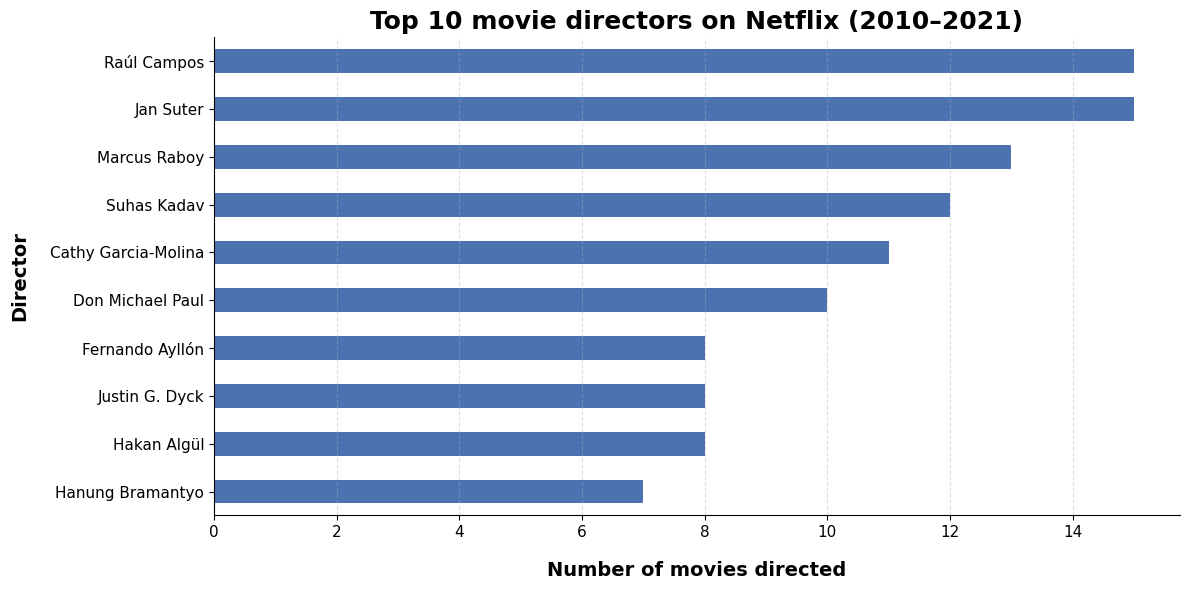

In [77]:
"""Who are the most popular directors?
Again, for this we will have to divide the rows that have more than one value for 'director'."""

movies_since_2010_unique_directors = movies_since_2010.assign(director=movies_since_2010["director"].str.split(", "))
movies_since_2010_unique_directors = movies_since_2010_unique_directors.explode("director").reset_index(drop=True)

"""There are a lot of movies with unknown directors. We have to eliminate those:"""

movies_since_2010_unique_directors = movies_since_2010_unique_directors[movies_since_2010_unique_directors["director"] != "Unknown"]

movie_directors = movies_since_2010_unique_directors.groupby("director")["director"].count()

"""We need to sort the values first in ascending order, keeping the first 10, and then sort those 10 in descending order, because the 'barh' kind of plot shows items from bottom to top."""

movie_directors_top10 = movie_directors.sort_values(ascending=False).head(10)
movie_directors_top10 = movie_directors_top10.sort_values()

plt.figure(figsize=(12, 6))

movie_directors_top10.plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 10 movie directors on Netflix (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()


In [78]:
"""Let's check the top movie directors discriminated by genre. First, we have to get rid of the unknown directors."""

movie_directors_by_genre = movies_since_2010_unique_directors[movies_since_2010_unique_directors["director"] != "Unknown"]
movie_directors_by_genre = movie_directors_by_genre.groupby("director")[genres].sum()

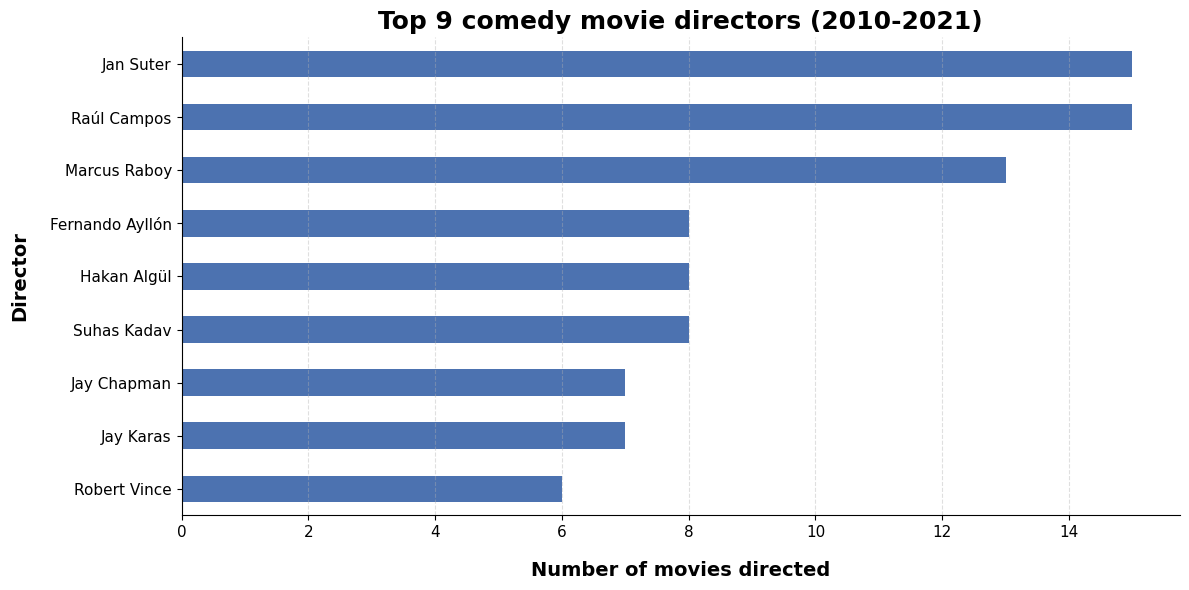

In [79]:
"""Top comedy movie directors"""

top_comedy_movie_directors = movie_directors_by_genre.sort_values(by="Comedy", ascending=False).head(9)
top_comedy_movie_directors = top_comedy_movie_directors.sort_values(by="Comedy")

plt.figure(figsize=(12, 6))

top_comedy_movie_directors["Comedy"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 9 comedy movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

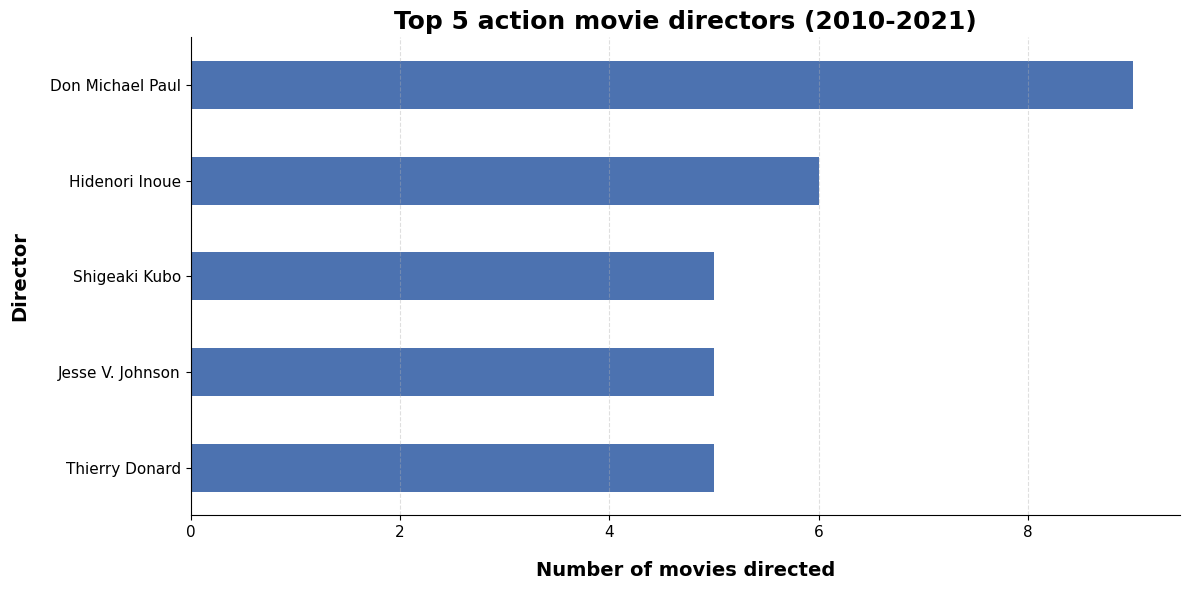

In [80]:
"""Top action movie directors"""

top_action_movie_directors = movie_directors_by_genre.sort_values(by="Action", ascending=False).head(5)
top_action_movie_directors = top_action_movie_directors.sort_values(by="Action")

plt.figure(figsize=(12, 6))

top_action_movie_directors["Action"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 5 action movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

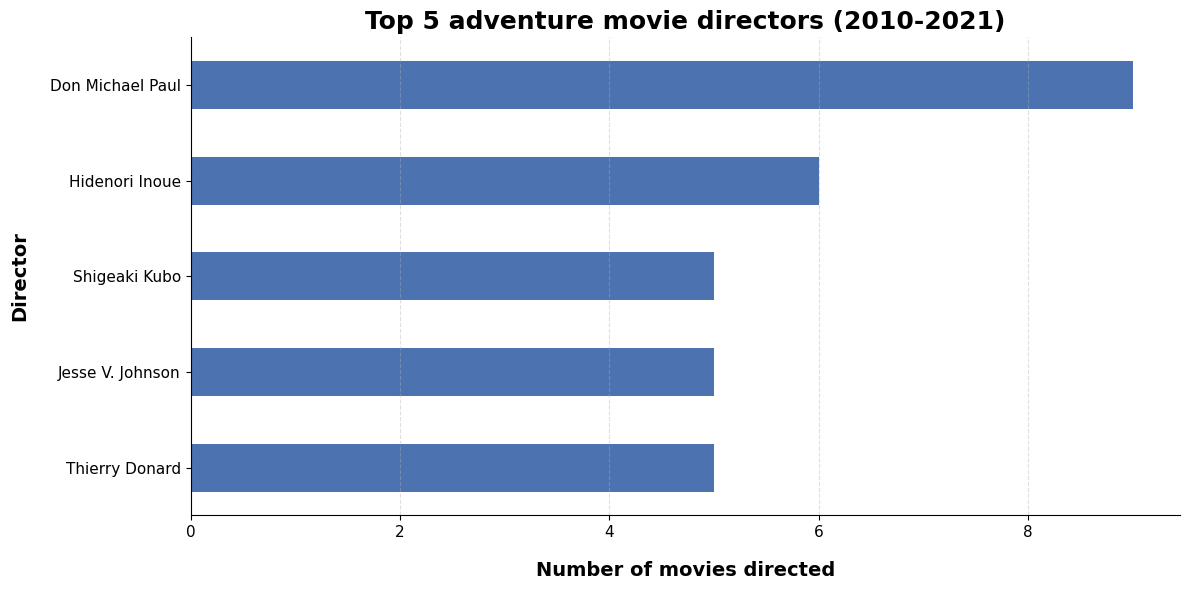

In [81]:
"""Top adventure movie directors"""

top_adventure_movie_directors = movie_directors_by_genre.sort_values(by="Adventure", ascending=False).head(5)
top_adventure_movie_directors = top_adventure_movie_directors.sort_values(by="Adventure")

plt.figure(figsize=(12, 6))

top_adventure_movie_directors["Adventure"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 5 adventure movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

TV

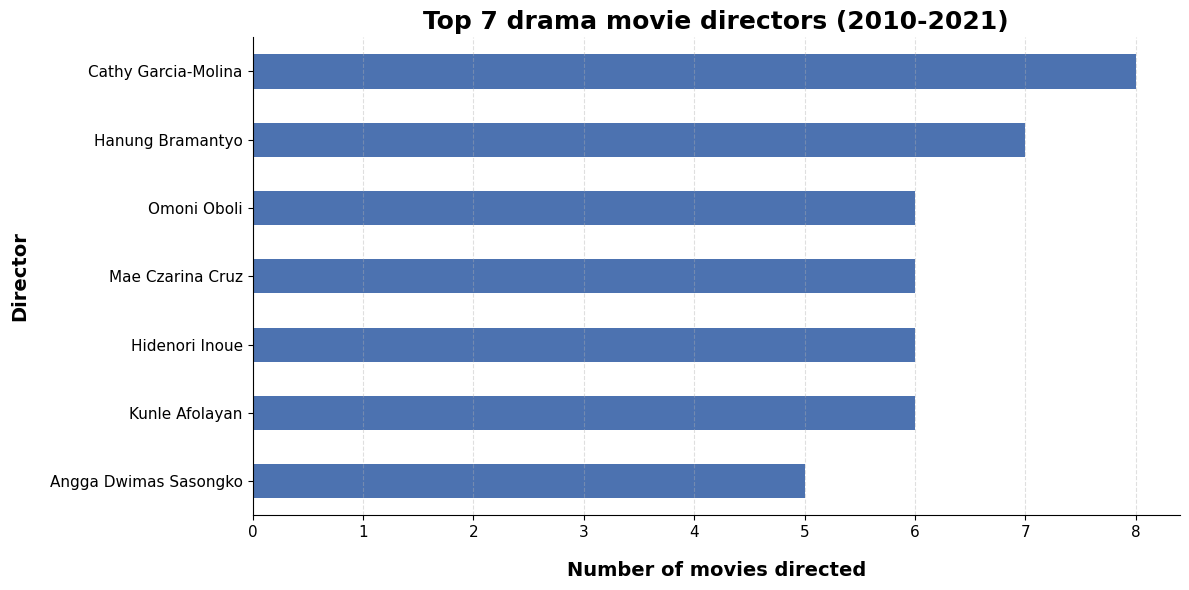

In [82]:
"""Top drama movie directors"""

top_drama_movie_directors = movie_directors_by_genre.sort_values(by="Drama", ascending=False).head(7)
top_drama_movie_directors = top_drama_movie_directors.sort_values(by="Drama")

plt.figure(figsize=(12, 6))

top_drama_movie_directors["Drama"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 7 drama movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

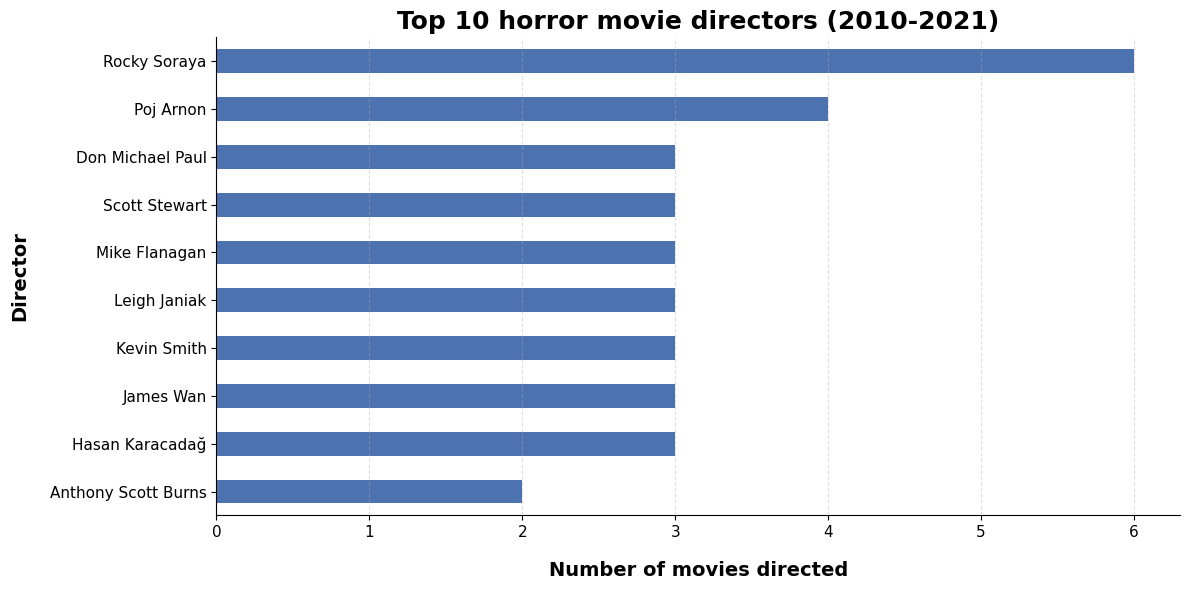

In [83]:
"""Top horror movie directors"""

top_horror_movie_directors = movie_directors_by_genre.sort_values(by="Horror", ascending=False).head(10)
top_horror_movie_directors = top_horror_movie_directors.sort_values(by="Horror")

plt.figure(figsize=(12, 6))

top_horror_movie_directors["Horror"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 10 horror movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

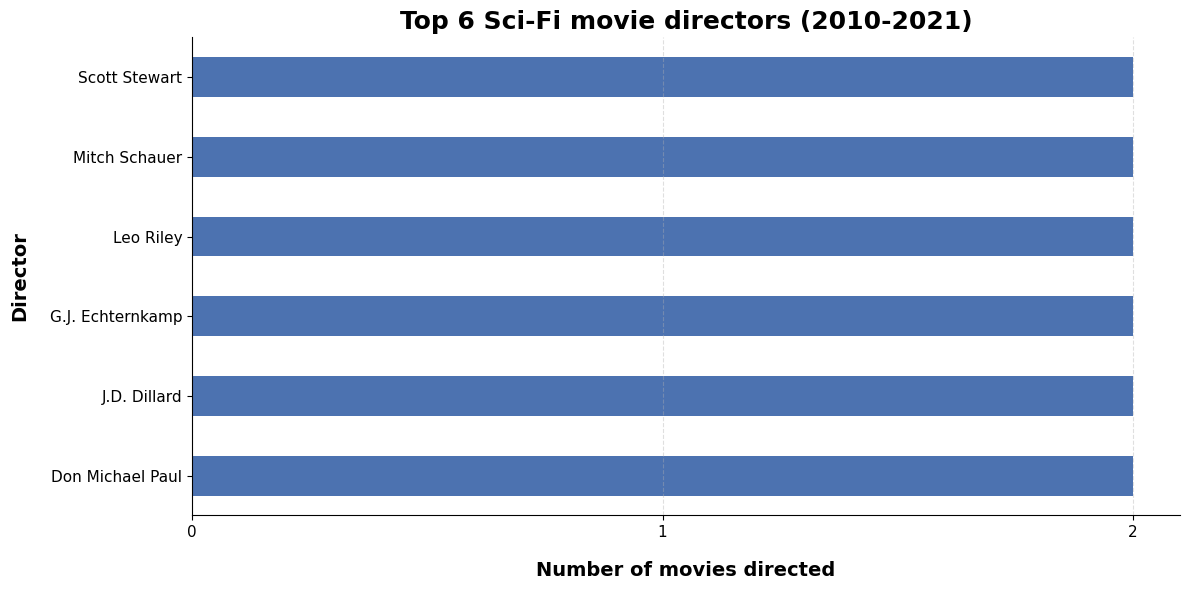

In [84]:
"""Top Sci-Fi movie directors"""

top_scifi_movie_directors = movie_directors_by_genre.sort_values(by="Sci-Fi", ascending=False).head(6)
top_scifi_movie_directors = top_scifi_movie_directors.sort_values(by="Sci-Fi")

plt.figure(figsize=(12, 6))

top_scifi_movie_directors["Sci-Fi"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 Sci-Fi movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

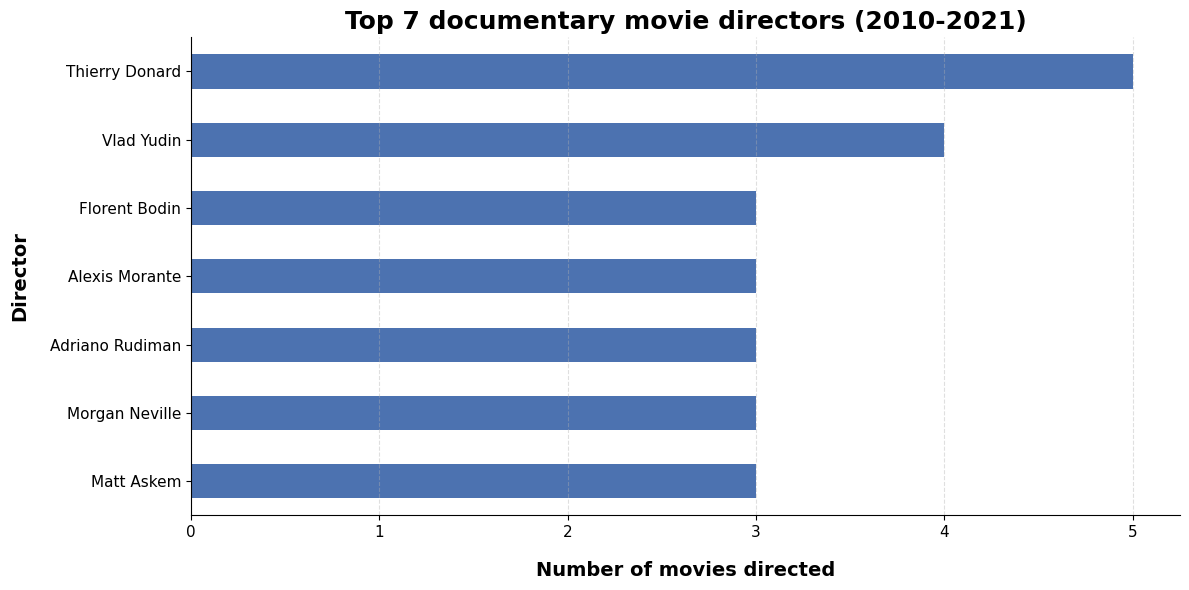

In [85]:
"""Top documentary movie directors"""

top_documentary_movie_directors = movie_directors_by_genre.sort_values(by="Documentary", ascending=False).head(7)
top_documentary_movie_directors = top_documentary_movie_directors.sort_values(by="Documentary")

plt.figure(figsize=(12, 6))

top_documentary_movie_directors["Documentary"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 7 documentary movie directors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

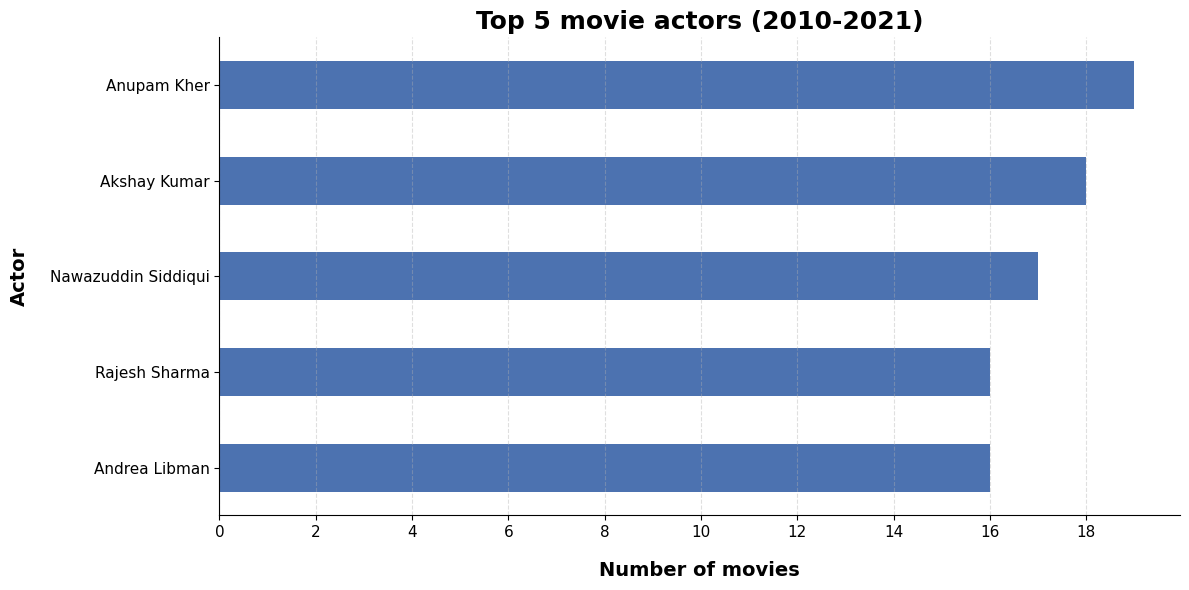

In [86]:
"""Let's see who are the top movie actors. As we did for directors, we will divide each row so that only one actor appears on each instance. That way we end up with several instances of the
same movie, but showing one actor each (the cast gets splitted into each individual member). We have to exclude all instances (all movies) that have 'Unknown' as the value for its cast.
Finally, since now the cast is split into each actor, we rename the column 'cast' to 'actor', since it's more appropriate."""

movies_since_2010_unique_actors = movies_since_2010.assign(cast=movies_since_2010["cast"].str.split(", "))
movies_since_2010_unique_actors = movies_since_2010_unique_actors.explode("cast").reset_index(drop=True)
movies_since_2010_unique_actors = movies_since_2010_unique_actors[movies_since_2010_unique_actors["cast"] != "Unknown"]
movies_since_2010_unique_actors = movies_since_2010_unique_actors.rename(columns={"cast": "actor"})

top_movie_actors = movies_since_2010_unique_actors.groupby("actor")["actor"].count()
top_movie_actors = top_movie_actors.sort_values(ascending=False).head(5)
top_movie_actors = top_movie_actors.sort_values()

plt.figure(figsize=(12, 6))

top_movie_actors.plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 5 movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [87]:
"""Now we'll explore the top actors for each genre."""

movie_actors_by_genre = movies_since_2010_unique_actors.groupby("actor")[genres].sum()

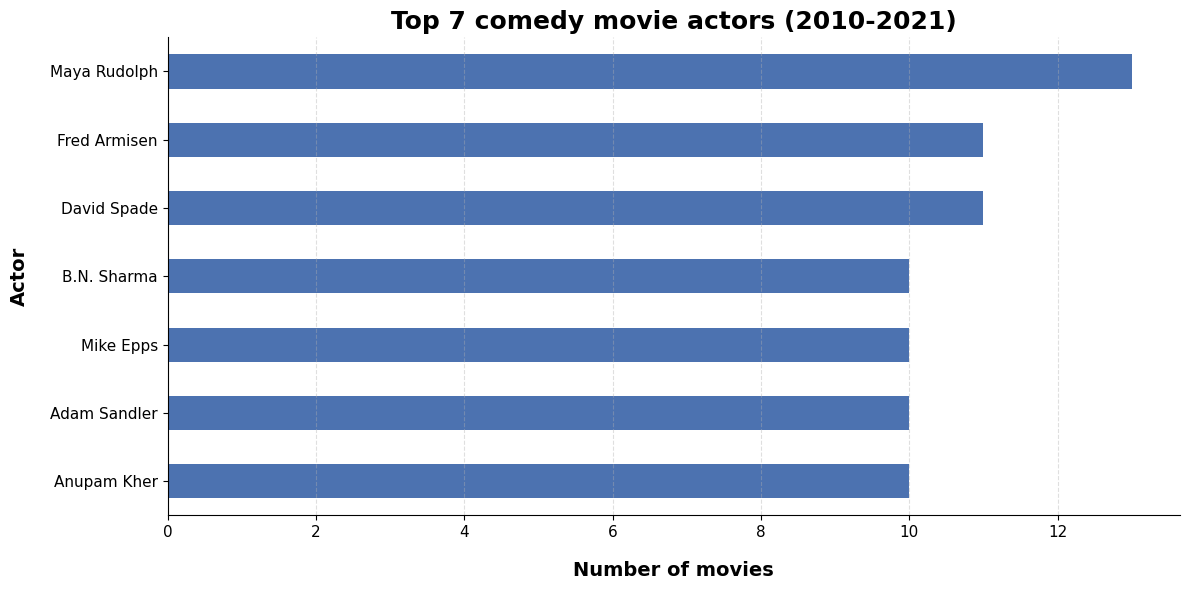

In [88]:
"Top comedy movie actors"

top_comedy_movie_actors = movie_actors_by_genre.sort_values(by="Comedy", ascending=False).head(7)
top_comedy_movie_actors = top_comedy_movie_actors.sort_values(by="Comedy")

plt.figure(figsize=(12, 6))

top_comedy_movie_actors["Comedy"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 7 comedy movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

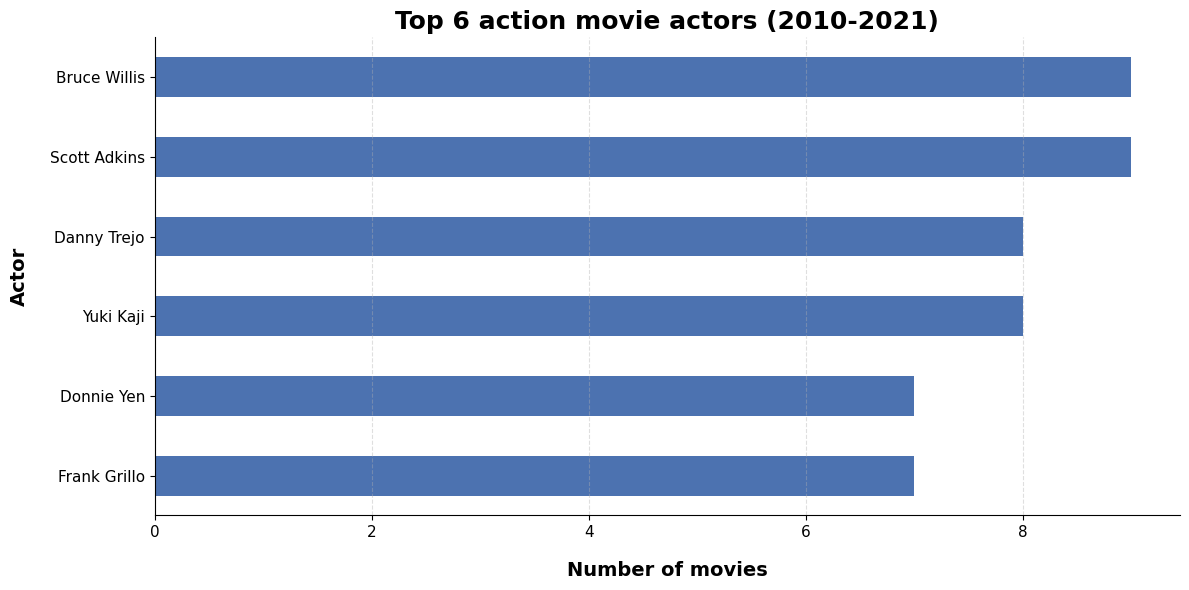

In [89]:
"Top action movie actors"

top_action_movie_actors = movie_actors_by_genre.sort_values(by="Action", ascending=False).head(6)
top_action_movie_actors = top_action_movie_actors.sort_values(by="Action")

plt.figure(figsize=(12, 6))

top_action_movie_actors["Action"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 action movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

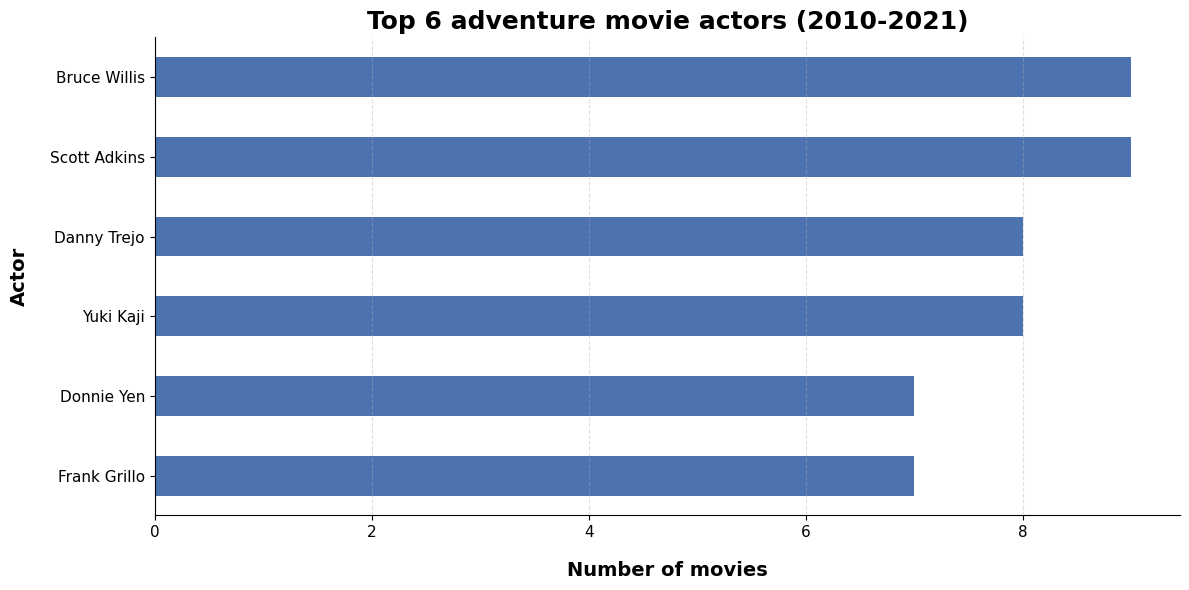

In [90]:
"Top adventure movie actors"

top_adventure_movie_actors = movie_actors_by_genre.sort_values(by="Adventure", ascending=False).head(6)
top_adventure_movie_actors = top_adventure_movie_actors.sort_values(by="Adventure")

plt.figure(figsize=(12, 6))

top_adventure_movie_actors["Adventure"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 adventure movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

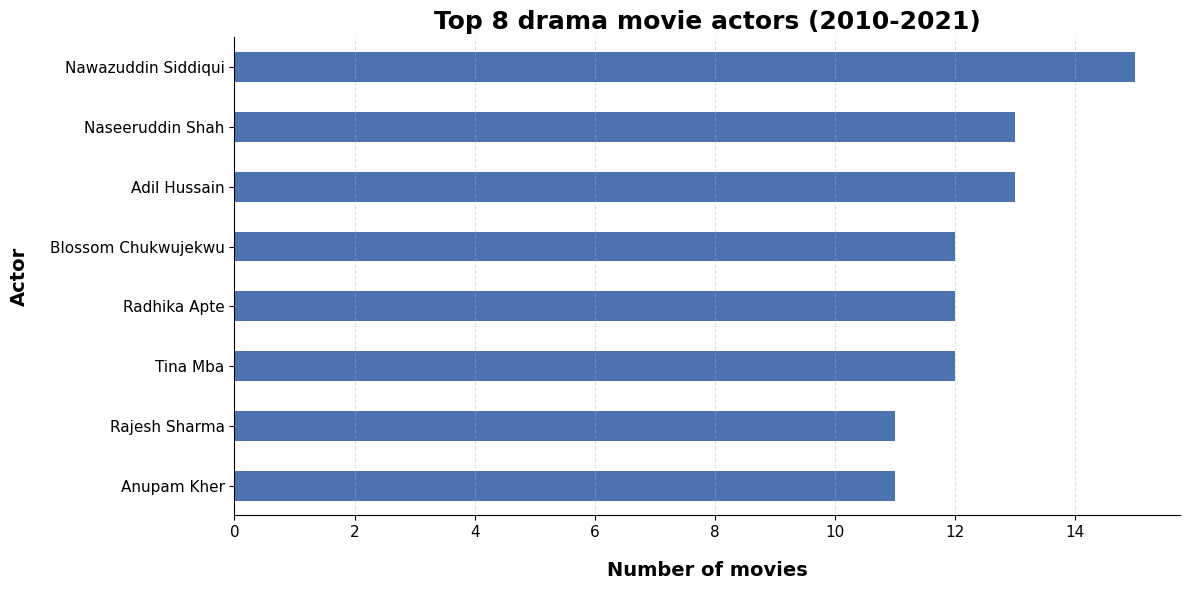

In [91]:
"Top drama movie actors"

top_drama_movie_actors = movie_actors_by_genre.sort_values(by="Drama", ascending=False).head(8)
top_drama_movie_actors = top_drama_movie_actors.sort_values(by="Drama")

plt.figure(figsize=(12, 6))

top_drama_movie_actors["Drama"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 8 drama movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

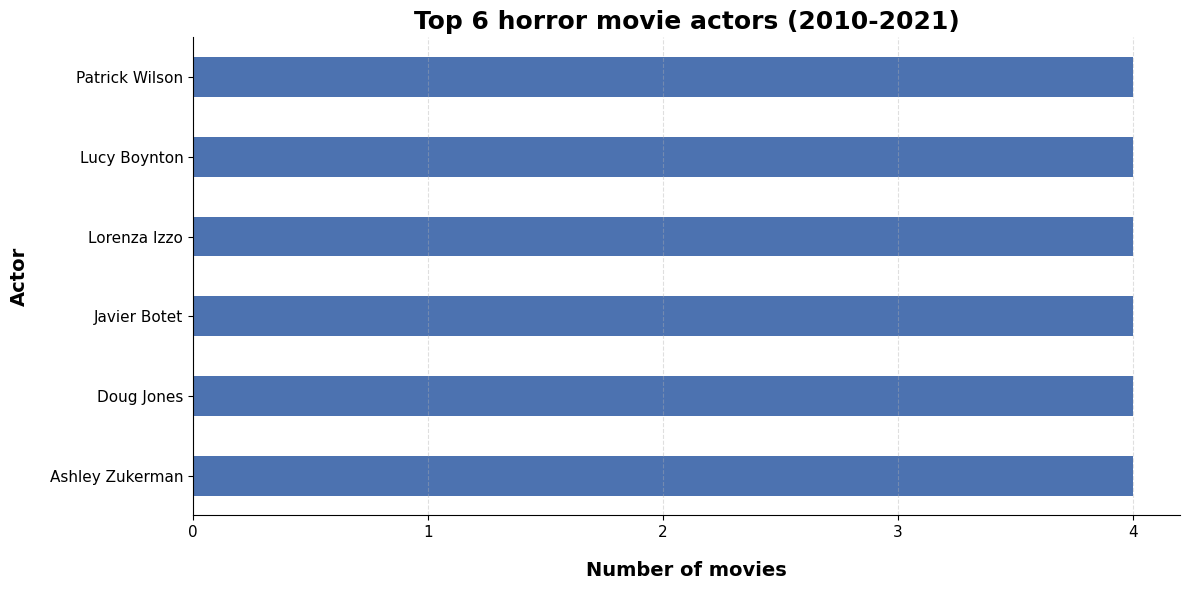

In [92]:
"Top horror movie actors"

top_horror_movie_actors = movie_actors_by_genre.sort_values(by="Horror", ascending=False).head(6)
top_horror_movie_actors = top_horror_movie_actors.sort_values(by="Horror")

plt.figure(figsize=(12, 6))

top_horror_movie_actors["Horror"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 horror movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

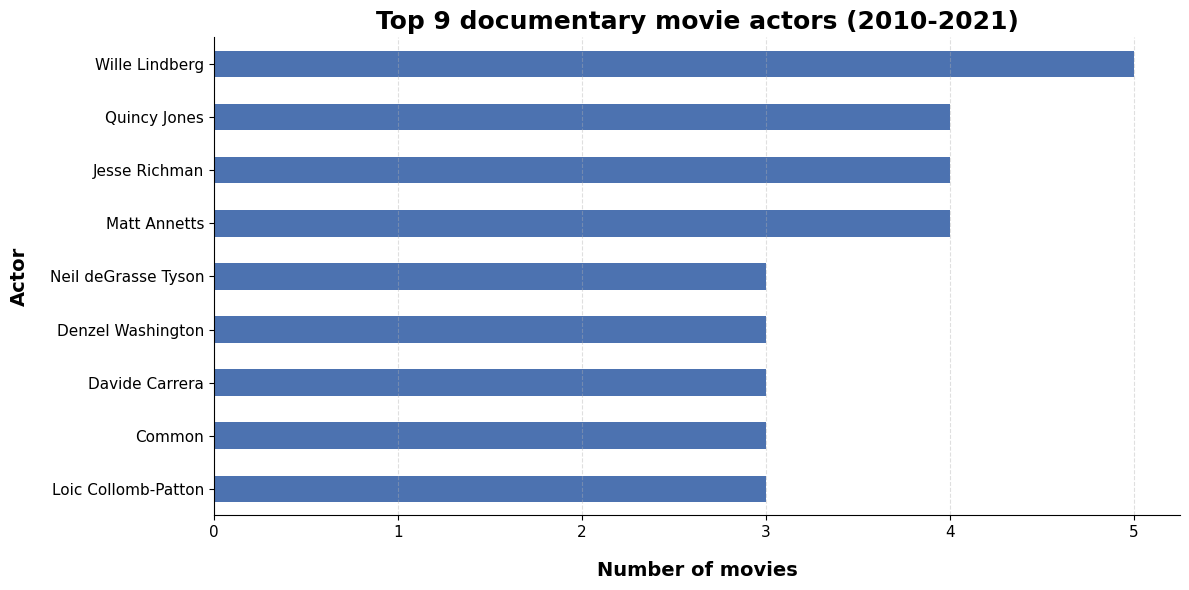

In [93]:
"Top documentary movie actors"

top_documentary_movie_actors = movie_actors_by_genre.sort_values(by="Documentary", ascending=False).head(9)
top_documentary_movie_actors = top_documentary_movie_actors.sort_values(by="Documentary")

plt.figure(figsize=(12, 6))

top_documentary_movie_actors["Documentary"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 9 documentary movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

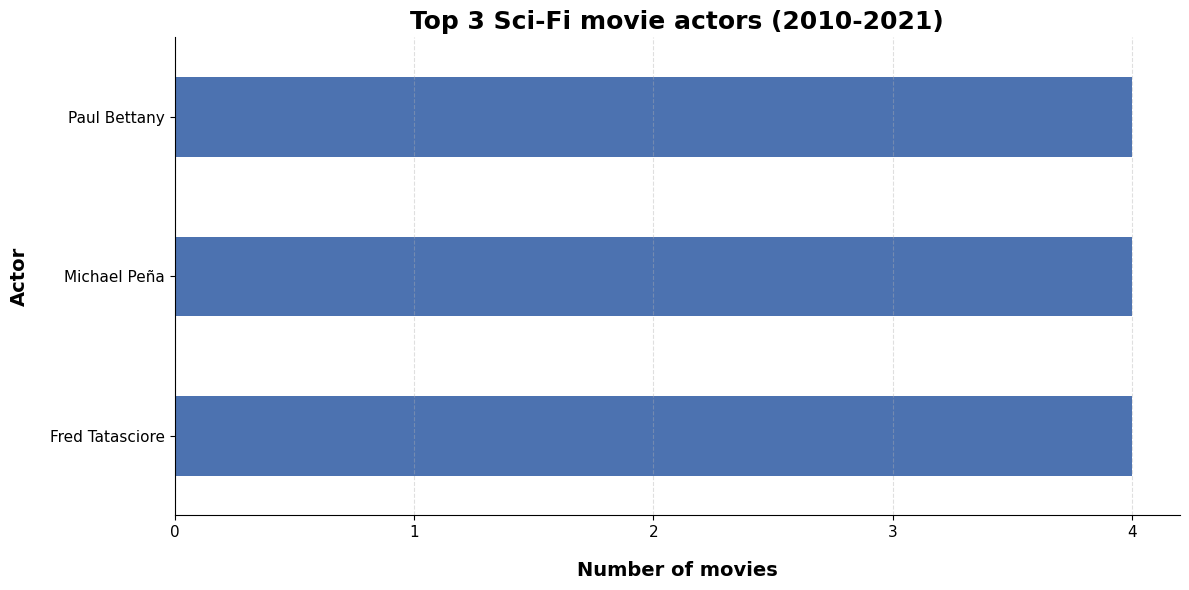

In [94]:
"Top Sci-Fi actors"

top_scifi_movie_actors = movie_actors_by_genre.sort_values(by="Sci-Fi", ascending=False).head(3)
top_scifi_movie_actors = top_scifi_movie_actors.sort_values(by="Sci-Fi")

plt.figure(figsize=(12, 6))

top_scifi_movie_actors["Sci-Fi"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 3 Sci-Fi movie actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of movies",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

LET'S DO THE SAME ANALYSIS FOR TV SHOWS

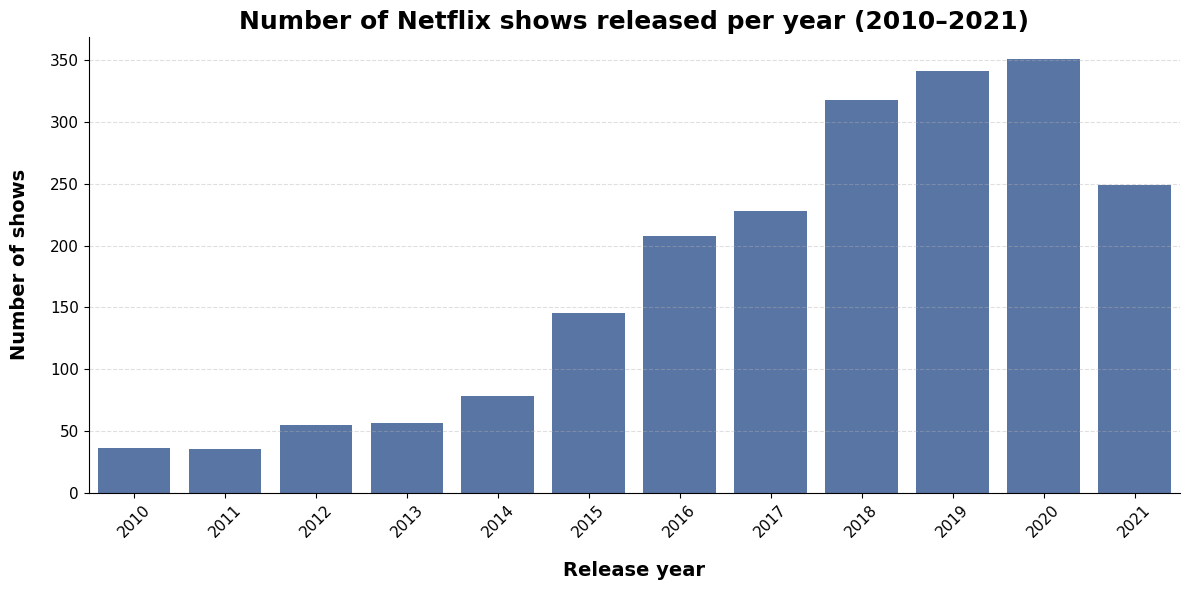

In [95]:
shows_since_2010 = netflix_TV[netflix_TV["release_year"] >= 2010]
shows_per_year = shows_since_2010["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    x=shows_per_year.index,
    y=shows_per_year.values,
    color="#4C72B0"
)

plt.title("Number of Netflix shows released per year (2010–2021)", fontsize=18, weight="bold")

plt.xlabel("Release year",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

sns.despine()

plt.tight_layout()
plt.show()

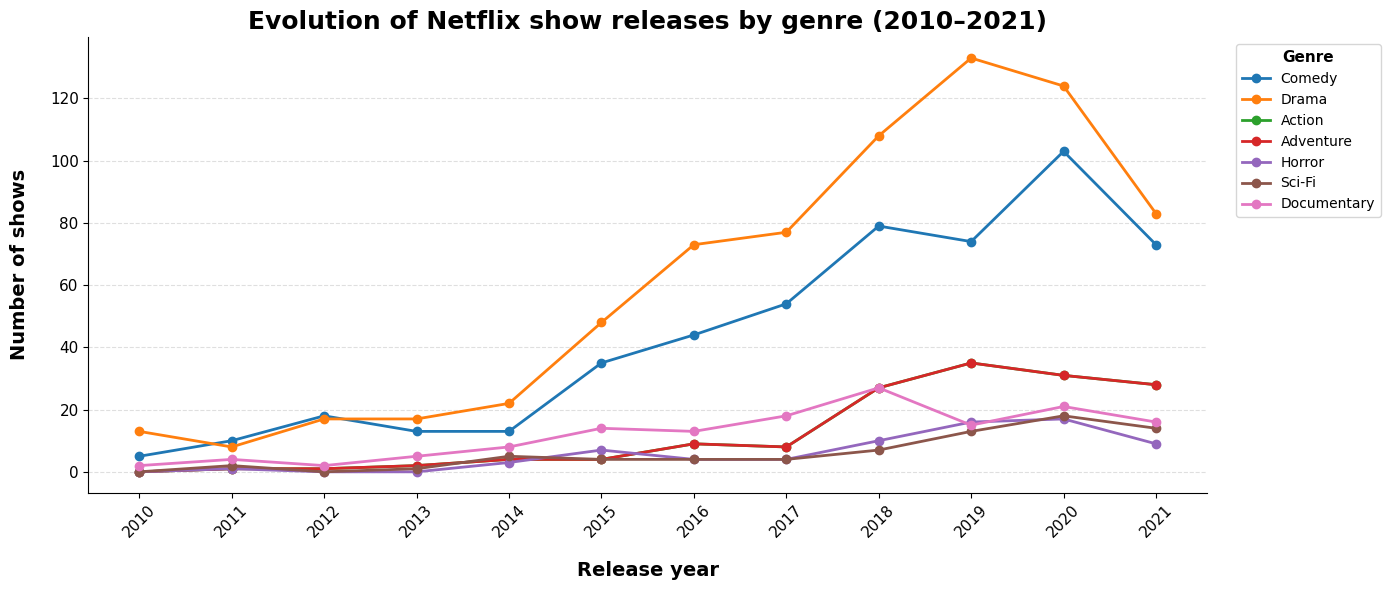

In [96]:
genres = ["Comedy", "Drama", "Action", "Adventure", "Horror", "Sci-Fi", "Documentary"]

shows_per_year_by_genre = shows_since_2010.groupby("release_year")[genres].sum()

plt.figure(figsize=(14, 6))

for genre in genres:
    plt.plot(
        shows_per_year_by_genre.index,
        shows_per_year_by_genre[genre],
        marker="o",
        linewidth=2,
        label=genre
    )

plt.title(
    "Evolution of Netflix show releases by genre (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Release year",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(shows_per_year_by_genre.index, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

legend = plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend.get_title().set_fontsize(11)
legend.get_title().set_fontweight("bold")

sns.despine()
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

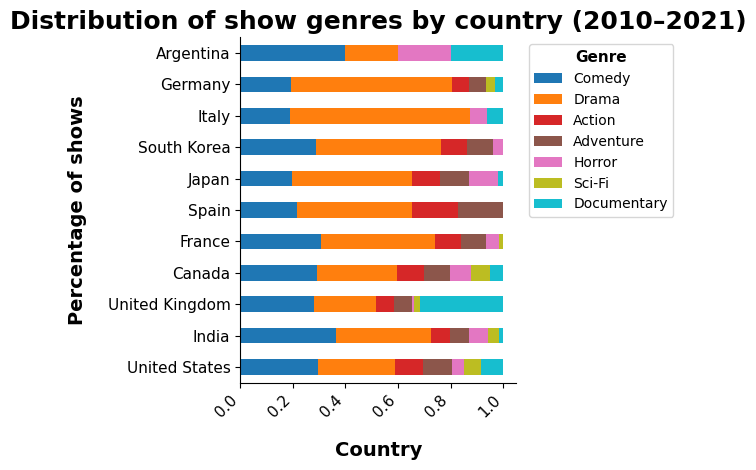

In [97]:
shows_since_2010_unique_country = shows_since_2010.assign(country=shows_since_2010["country"].str.split(", "))
shows_since_2010_unique_country = shows_since_2010_unique_country.explode("country").reset_index(drop=True)

shows_by_genre_and_country = shows_since_2010_unique_country.groupby("country")[genres].sum()

countries_to_show = ["United States", "India", "United Kingdom", "Canada", "France", "Spain", "Japan", "South Korea", "Italy", "Germany", "Argentina"]
shows_by_genre_and_country_filtered = shows_by_genre_and_country.loc[countries_to_show]

# We sum all the shows by country
total_shows_by_country = shows_by_genre_and_country_filtered.sum(axis=1)

# Now we calculate the percentage of each genre by country, dividing the number of shows for each genre by the total amount of shows for that country.
shows_by_genre_and_country_pct = (shows_by_genre_and_country_filtered.div(total_shows_by_country, axis=0)
)

plt.figure(figsize=(14, 7))

shows_by_genre_and_country_pct.plot(
    kind="barh",
    stacked=True,
    colormap="tab10"
)

plt.title(
    "Distribution of show genres by country (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Country",
           fontsize=14,
           fontweight="bold",
           labelpad=15)
plt.ylabel("Percentage of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)

plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend = plt.legend(
    title="Genre",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

legend.get_title().set_fontsize(11)
legend.get_title().set_fontweight("bold")

sns.despine()
plt.tight_layout()
plt.show()

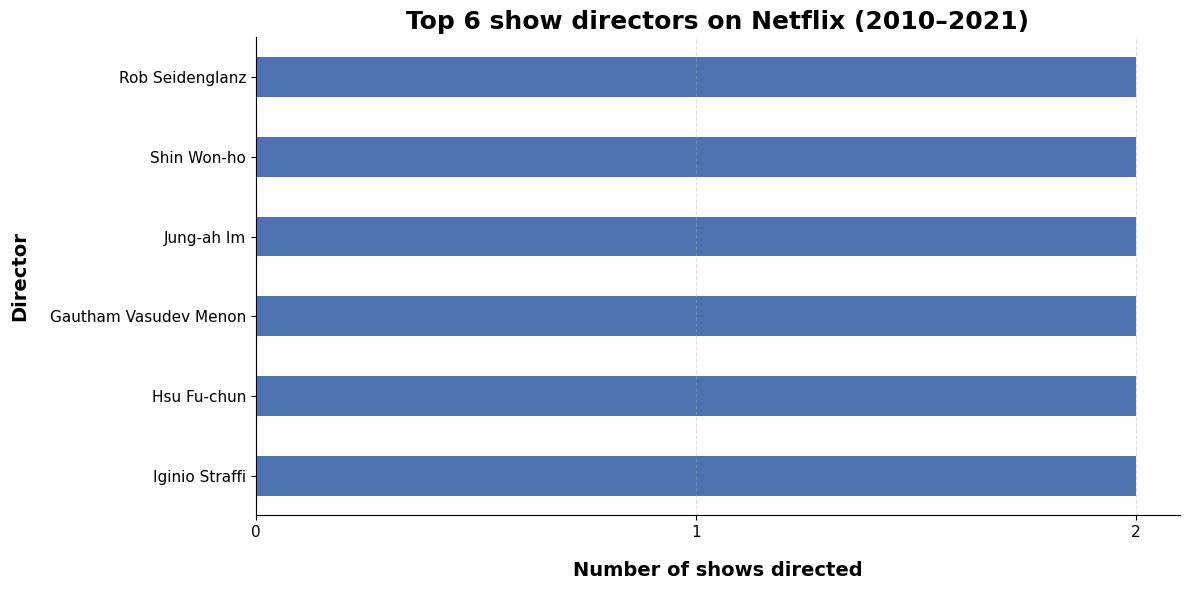

In [98]:
"""Let's show the top TV show directors:"""

shows_since_2010_unique_directors = shows_since_2010.assign(director=shows_since_2010["director"].str.split(", "))
shows_since_2010_unique_directors = shows_since_2010_unique_directors.explode("director").reset_index(drop=True)

"""There are a lot of movies with unknown directors. We have to eliminate those:"""

shows_since_2010_unique_directors = shows_since_2010_unique_directors[shows_since_2010_unique_directors["director"] != "Unknown"]

show_directors = shows_since_2010_unique_directors.groupby("director")["director"].count()

"""We need to sort the values first in ascending order, keeping the first 6, and then sort those 6 in descending order, because the 'barh' kind of plot shows items from bottom to top."""

show_directors_top10 = show_directors.sort_values(ascending=False).head(6)
show_directors_top10 = show_directors_top10.sort_values()

plt.figure(figsize=(12, 6))

show_directors_top10.plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 show directors on Netflix (2010–2021)",
    fontsize=18,
    weight="bold"
)
plt.xlabel("Number of shows directed",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Director",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


SINCE THE DIRECTORS WITH THE MOST SHOWS DIRECTED ONLY APPEAR IN TWO SHOWS, IT DOESN'T MAKE SENSE TO DO A PARTICULAR ANALYSIS OF THE TOP DIRECTORS FOR EACH GENRE, BECAUSE MOST OF THEM WILL ONLY HAVE ONE SHOW TO THEIR NAME.

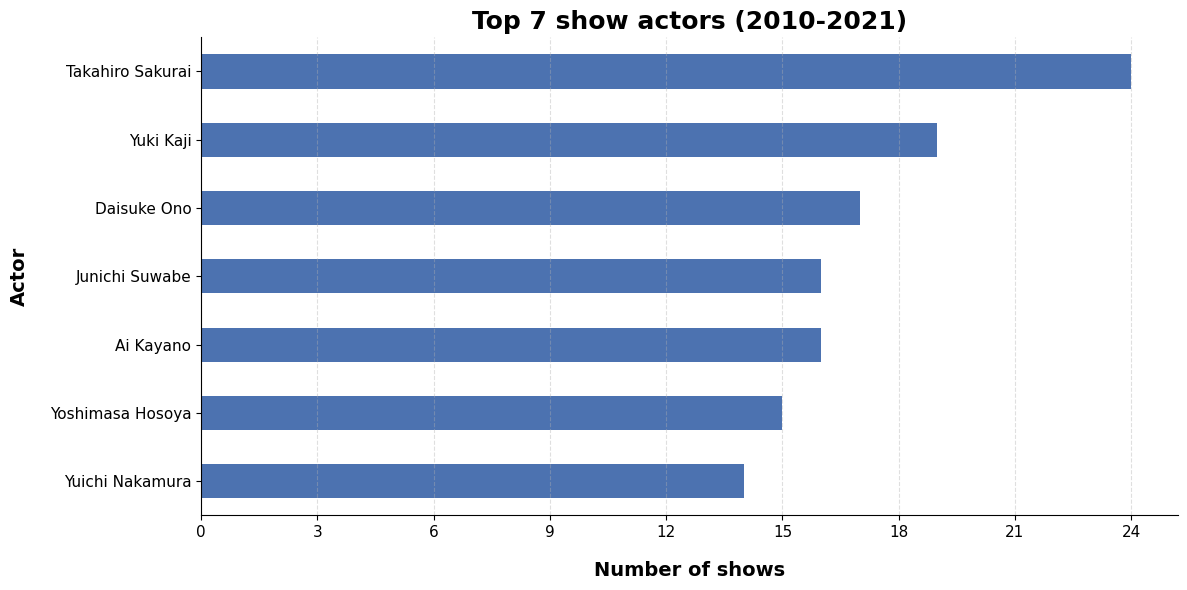

In [99]:
shows_since_2010_unique_actors = shows_since_2010.assign(cast=shows_since_2010["cast"].str.split(", "))
shows_since_2010_unique_actors = shows_since_2010_unique_actors.explode("cast").reset_index(drop=True)
shows_since_2010_unique_actors = shows_since_2010_unique_actors[shows_since_2010_unique_actors["cast"] != "Unknown"]
shows_since_2010_unique_actors = shows_since_2010_unique_actors.rename(columns={"cast": "actor"})

top_show_actors = shows_since_2010_unique_actors.groupby("actor")["actor"].count()
top_show_actors = top_show_actors.sort_values(ascending=False).head(7)
top_show_actors = top_show_actors.sort_values()

plt.figure(figsize=(12, 6))

top_show_actors.plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 7 show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [100]:
"""Now we'll explore the top actors for each genre."""

show_actors_by_genre = shows_since_2010_unique_actors.groupby("actor")[genres].sum()

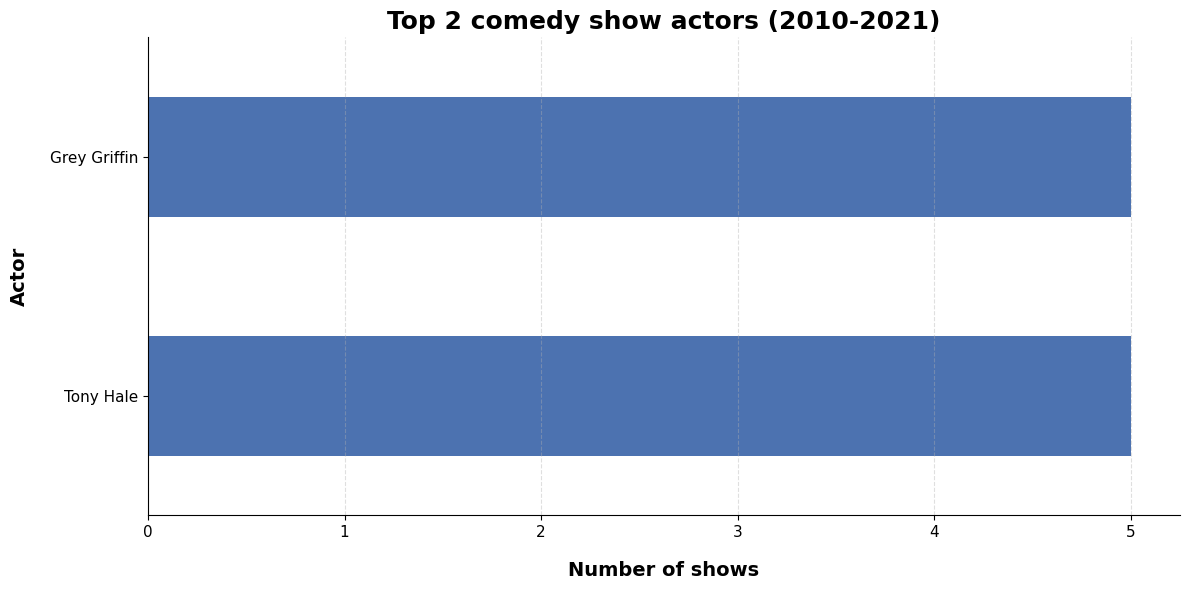

In [101]:
"Top comedy show actors"

top_comedy_show_actors = show_actors_by_genre.sort_values(by="Comedy", ascending=False).head(2)
top_comedy_show_actors = top_comedy_show_actors.sort_values(by="Comedy")

plt.figure(figsize=(12, 6))

top_comedy_show_actors["Comedy"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 2 comedy show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

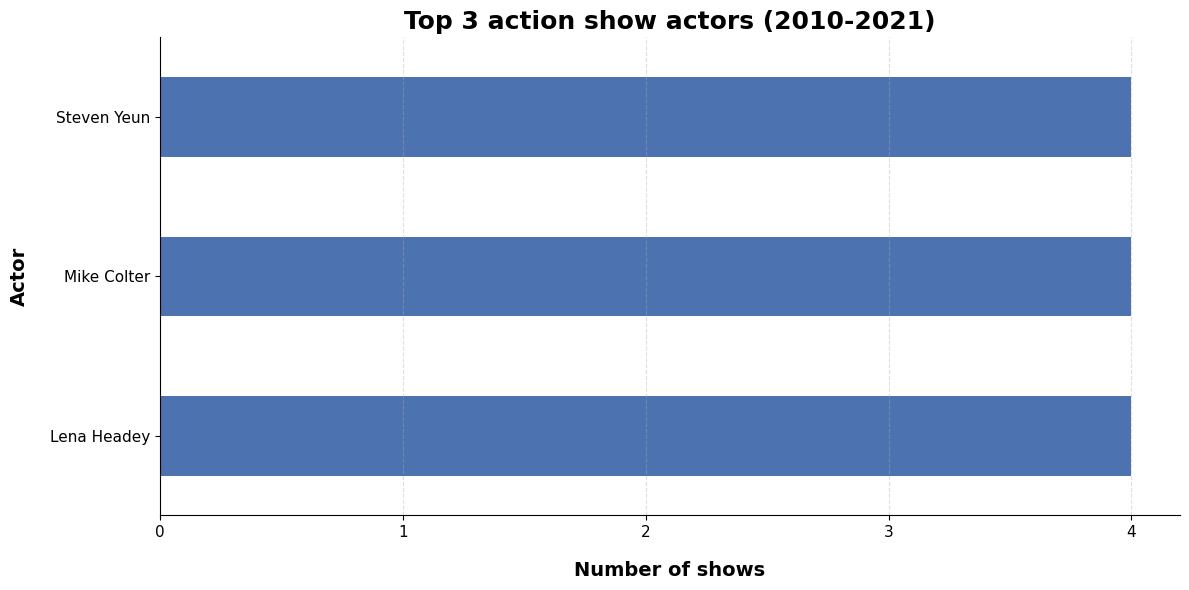

In [102]:
"Top action show actors"

top_action_show_actors = show_actors_by_genre.sort_values(by="Action", ascending=False).head(3)
top_action_show_actors = top_action_show_actors.sort_values(by="Action")

plt.figure(figsize=(12, 6))

top_action_show_actors["Action"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 3 action show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

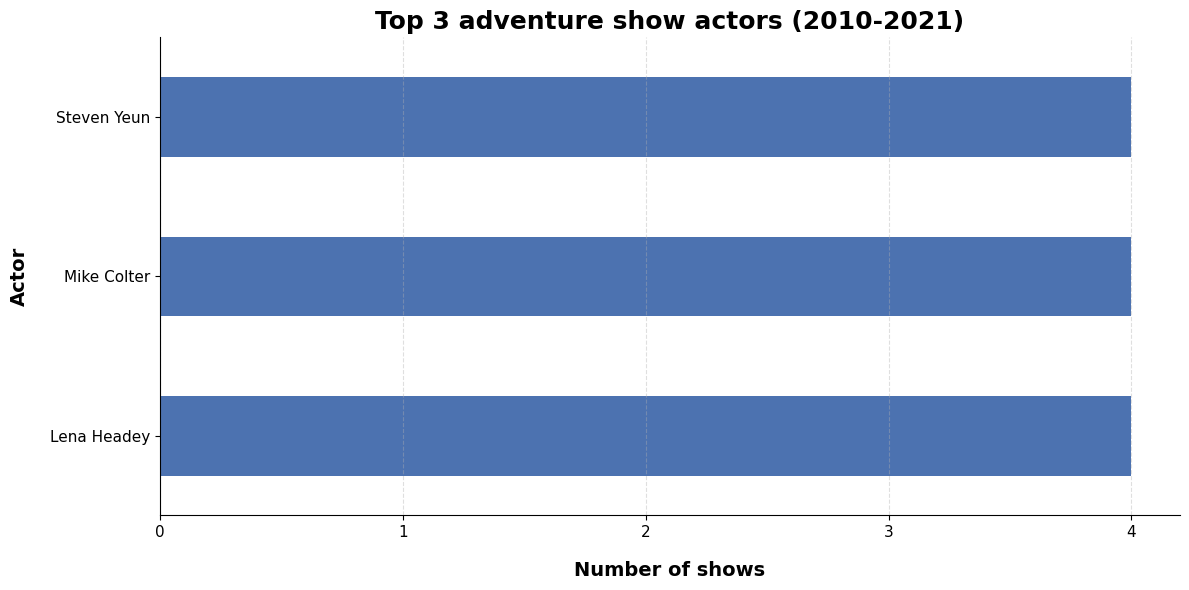

In [103]:
"Top adventure show actors"

top_adventure_show_actors = show_actors_by_genre.sort_values(by="Adventure", ascending=False).head(3)
top_adventure_show_actors = top_adventure_show_actors.sort_values(by="Adventure")

plt.figure(figsize=(12, 6))

top_adventure_show_actors["Adventure"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 3 adventure show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

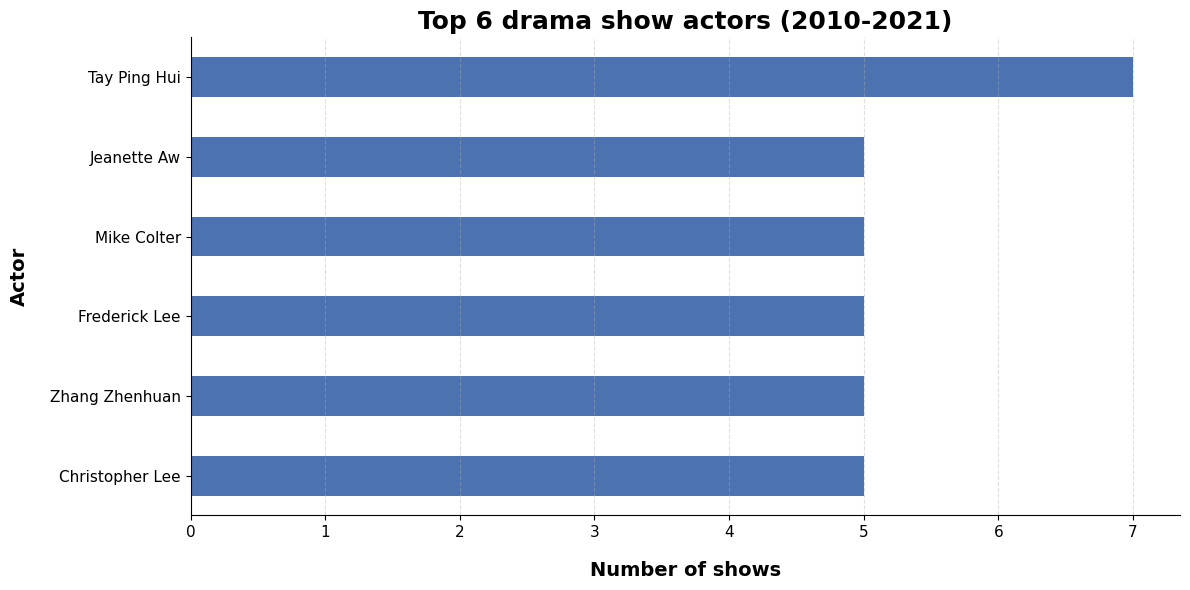

In [104]:
"Top drama show actors"

top_drama_show_actors = show_actors_by_genre.sort_values(by="Drama", ascending=False).head(6)
top_drama_show_actors = top_drama_show_actors.sort_values(by="Drama")

plt.figure(figsize=(12, 6))

top_drama_show_actors["Drama"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 drama show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

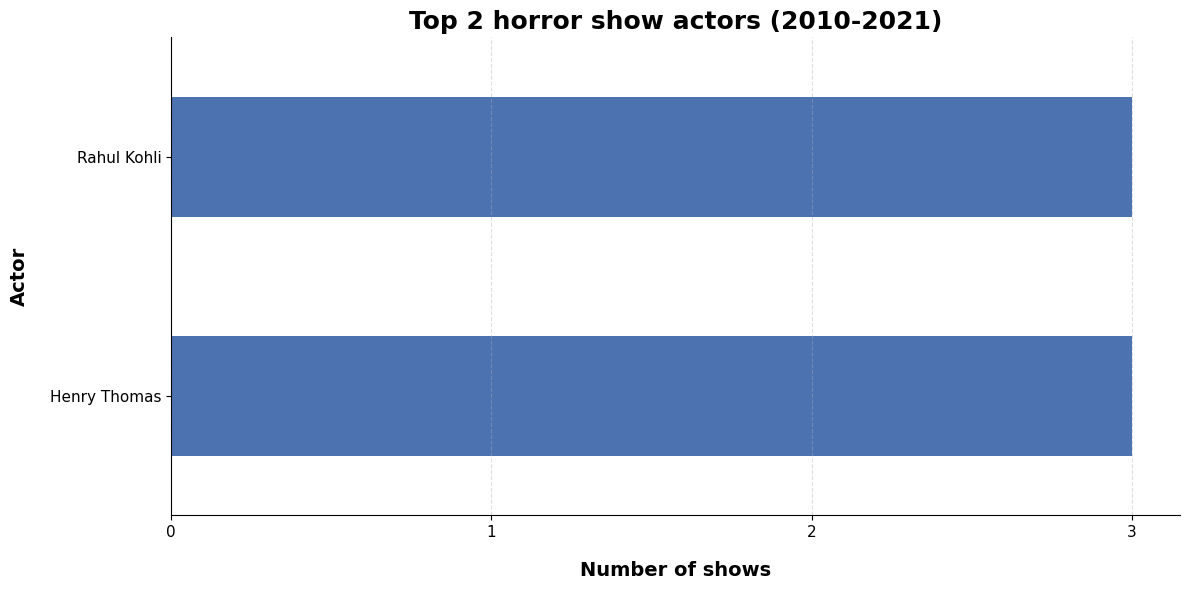

In [105]:
"Top horror show actors"

top_horror_show_actors = show_actors_by_genre.sort_values(by="Horror", ascending=False).head(2)
top_horror_show_actors = top_horror_show_actors.sort_values(by="Horror")

plt.figure(figsize=(12, 6))

top_horror_show_actors["Horror"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 2 horror show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

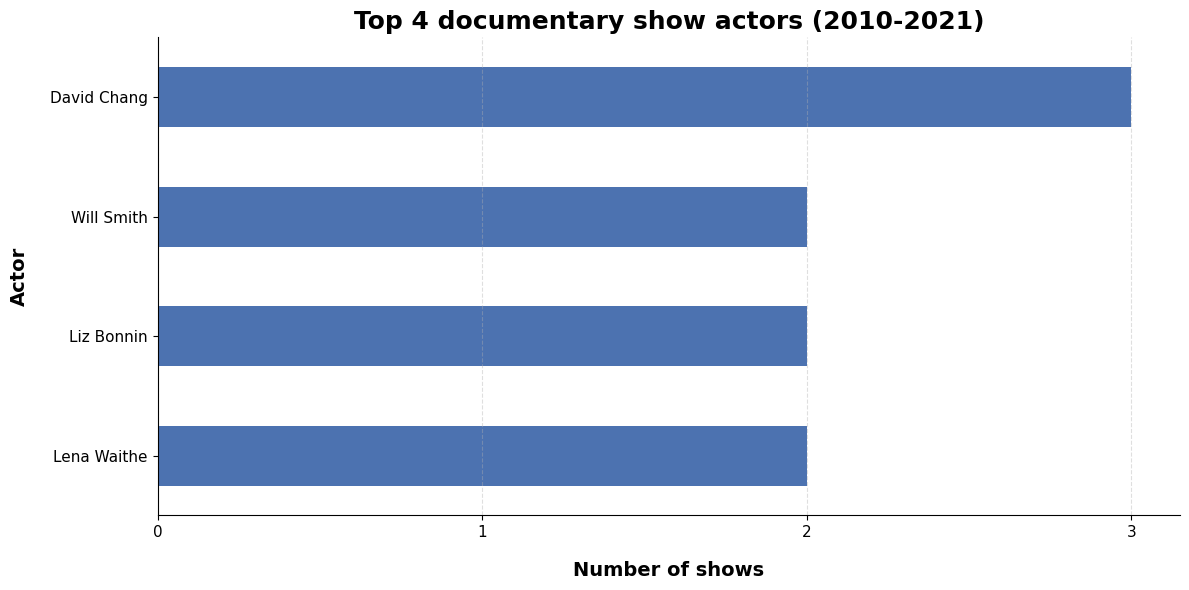

In [106]:
"Top documentary show actors"

top_documentary_show_actors = show_actors_by_genre.sort_values(by="Documentary", ascending=False).head(4)
top_documentary_show_actors = top_documentary_show_actors.sort_values(by="Documentary")

plt.figure(figsize=(12, 6))

top_documentary_show_actors["Documentary"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 4 documentary show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

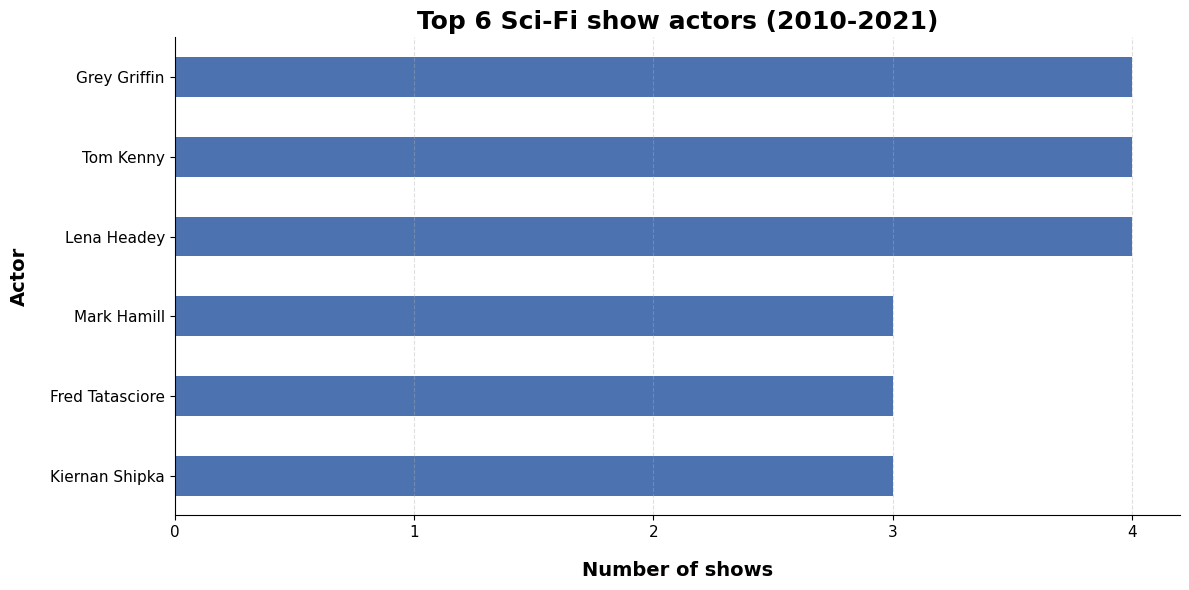

In [107]:
"Top Sci-Fi show actors"

top_scifi_show_actors = show_actors_by_genre.sort_values(by="Sci-Fi", ascending=False).head(6)
top_scifi_show_actors = top_scifi_show_actors.sort_values(by="Sci-Fi")

plt.figure(figsize=(12, 6))

top_scifi_show_actors["Sci-Fi"].plot(
    kind="barh",
    color="#4C72B0"
)

plt.title(
    "Top 6 Sci-Fi show actors (2010-2021)",
    fontsize=18,
    weight="bold"
)

plt.xlabel("Number of shows",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.ylabel("Actor",
           fontsize=14,
           fontweight="bold",
           labelpad=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.4)

sns.despine()
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()